## Box Blur/ Low Pass Filtering


Box blur reduces the noise in the image.  The filter can be used for images camptured in low light, pixelation, etc.

> Syntax
```python
dst =   cv2.blur(   src, ksize[, dst[, anchor[, borderType]]]   )
```


OpenCV provides a direct function called blur for blurring an image. Internally, blur uses filter2D (as the previous demo)

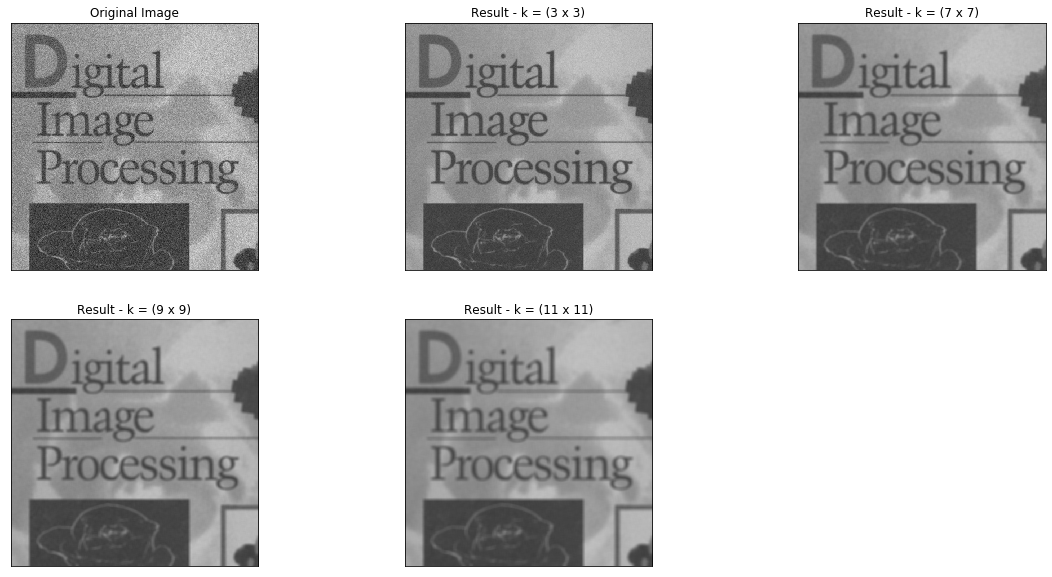

In [1]:
#Low Pass Image Filtering
import cv2
import math
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
###############################################


def LowPassImageFilter(rawImageData, kernelSizes=[0]):
    figIds = []
    # Generating FigureId's
    maxRows = math.ceil(len(kernelSizes)/3)
    figCounter = 0
    for row in range(maxRows):
        for col in range(3):
            figIds.append((maxRows*100)+30+(figCounter + 1))
            figCounter +=1
    plt.figure(figsize=[20,10])          
    counter = 0    
    for kernelSize in kernelSizes:
        if (kernelSize > 0):
            kernel = np.ones((kernelSize, kernelSize), dtype=np.float32) / kernelSize**2 
            #print(kernel)
            strKernel = "Result - k = (%d x %d)" % (kernelSize, kernelSize)
            plt.subplot(figIds[counter]);
            resultImageData = cv2.blur(imageData, (kernelSize, kernelSize), (-1,-1))
            
        else:
            strKernel = "Original Image"
            plt.subplot(figIds[counter]);
            resultImageData = rawImageData
        plt.imshow(resultImageData[..., ::-1])
        plt.xticks([]), plt.yticks([]) #To remove the ticks
        plt.title(strKernel)
        counter += 1
    return 

# Reading the Image
imageData = cv2.imread("../../../Images/book-cover-gaussian.tif")  #Color Image is Scanned
if imageData is None: print("Unable to open the image! please verify !!!")
    
LowPassImageFilter(imageData, kernelSizes = [0, 3, 7, 9, 11])

